In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('./Dataset/kc_house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
df = df.drop(['date','id','zipcode','yr_renovated','view','lat','long'],axis=1)

In [6]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df.isna().values.any()

False

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


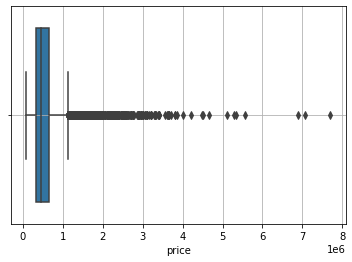

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df['price'])
plt.grid()

In [9]:
df = df[df['price'] <= 1000000]

In [10]:
X = df.drop(['price'],axis=1)
y = df.price

In [34]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [13]:
n_features = X_train.shape[1]
n_features

13

In [14]:
# define model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(n_features,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [15]:
# compile the model
model.compile(optimizer='adam', loss='mae')

In [16]:
#define early_stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# fit the model
model.fit(X_train, 
          y_train, 
          batch_size = 100, 
          epochs = 100, 
          callbacks = [early_stopping],
          validation_data = (X_test, y_test), 
          verbose=2)

Epoch 1/100
152/152 - 1s - loss: 463175.6250 - val_loss: 477516.7812 - 696ms/epoch - 5ms/step
Epoch 2/100
152/152 - 0s - loss: 443025.9688 - val_loss: 421485.9688 - 232ms/epoch - 2ms/step
Epoch 3/100
152/152 - 0s - loss: 319390.9062 - val_loss: 255193.2969 - 232ms/epoch - 2ms/step
Epoch 4/100
152/152 - 0s - loss: 199965.5000 - val_loss: 195136.8906 - 232ms/epoch - 2ms/step
Epoch 5/100
152/152 - 0s - loss: 175590.0938 - val_loss: 178832.1250 - 231ms/epoch - 2ms/step
Epoch 6/100
152/152 - 0s - loss: 160580.3906 - val_loss: 162801.7188 - 235ms/epoch - 2ms/step
Epoch 7/100
152/152 - 0s - loss: 147271.8125 - val_loss: 148774.8594 - 243ms/epoch - 2ms/step
Epoch 8/100
152/152 - 0s - loss: 134851.7188 - val_loss: 135892.0469 - 235ms/epoch - 2ms/step
Epoch 9/100
152/152 - 0s - loss: 124053.1172 - val_loss: 125396.1016 - 234ms/epoch - 2ms/step
Epoch 10/100
152/152 - 0s - loss: 116010.6250 - val_loss: 118615.3125 - 233ms/epoch - 2ms/step
Epoch 11/100
152/152 - 0s - loss: 111397.0703 - val_loss: 1

Epoch 89/100
152/152 - 0s - loss: 97239.4531 - val_loss: 98924.4219 - 236ms/epoch - 2ms/step
Epoch 90/100
152/152 - 0s - loss: 97220.6562 - val_loss: 98349.5547 - 231ms/epoch - 2ms/step
Epoch 91/100
152/152 - 0s - loss: 97197.7734 - val_loss: 98715.8281 - 233ms/epoch - 2ms/step
Epoch 92/100
152/152 - 0s - loss: 97185.8672 - val_loss: 98336.3359 - 235ms/epoch - 2ms/step
Epoch 93/100
152/152 - 0s - loss: 97129.3125 - val_loss: 98457.1953 - 230ms/epoch - 2ms/step
Epoch 94/100
152/152 - 0s - loss: 97087.8828 - val_loss: 98459.1094 - 235ms/epoch - 2ms/step
Epoch 95/100
152/152 - 0s - loss: 97113.2969 - val_loss: 98375.6250 - 226ms/epoch - 1ms/step
Epoch 96/100
152/152 - 0s - loss: 97072.8438 - val_loss: 98593.7891 - 237ms/epoch - 2ms/step
Epoch 97/100
152/152 - 0s - loss: 97027.4375 - val_loss: 98091.2578 - 235ms/epoch - 2ms/step
Epoch 98/100
152/152 - 0s - loss: 96966.4062 - val_loss: 98863.7266 - 259ms/epoch - 2ms/step
Epoch 99/100
152/152 - 0s - loss: 96966.3828 - val_loss: 98197.8516 - 

In [17]:
# evaluate the model
error = model.evaluate(X_test, y_test, verbose=0)
print('MAE: %.3f' % (error))

MAE: 98345.500


In [18]:
prediction = model.predict(X_test)

In [19]:
y_test = y_test.reset_index()
y_test = y_test.drop(['index'],axis=1)
y_test

,price
0,450500.0
1,915000.0
2,205000.0
3,314000.0
4,496000.0
...,...
5032,360000.0
5033,400000.0
5034,402101.0
5035,400000.0


In [20]:
prediction

array([[371016.22],
       [371082.88],
       [244556.75],
       ...,
       [252503.4 ],
       [402820.66],
       [257734.22]], dtype=float32)

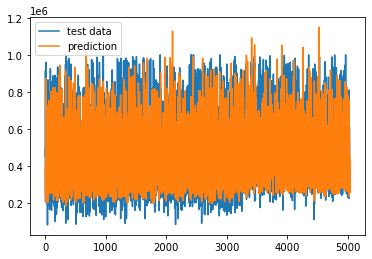

In [29]:
import matplotlib.pyplot as plt
plt.plot(y_test,label='test data')
plt.plot(prediction,label='prediction')
plt.legend()

Text(0, 0.5, 'Prediction')

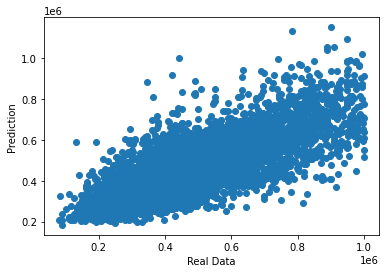

In [22]:
plt.scatter(y_test,prediction)
plt.xlabel('Real Data')
plt.ylabel('Prediction')

In [23]:
error = (prediction-y_test)/y_test
error.mean()

price    0.021092
dtype: float64

<AxesSubplot:>

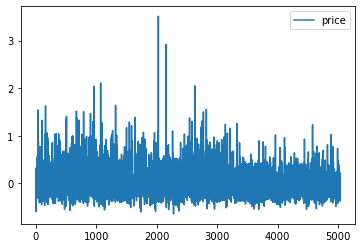

In [32]:
error.plot()